# Linear Regression

In [1]:
# create lin looking data
import numpy as np

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * np.random.randn(m, 1)

In [2]:
# calculating Qbest using normal eqn
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X) # add X0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y # @ inv()- inverse of matrix, @- matrix multi
theta_best

array([[ 4.64528847],
       [-0.68965984]])

In [3]:
# we got Q0=4.6 and Q1=-0.6 original eqn is 4+3x1+gaussian noise, og Q0=4 and Q1=3. close enough
# now making prediction with theta_best
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.64528847],
       [3.26596879]])

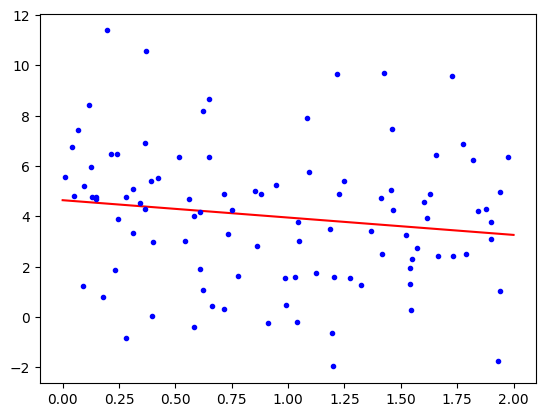

In [4]:
# plotting prediction
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-", label="predictions")
plt.plot(X, y, "b.")
plt.show()

In [5]:
# now lin_reg using scikitlearn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[4.64528847] [[-0.68965984]]
[[4.64528847]
 [3.26596879]]


In [6]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[ 4.64528847],
       [-0.68965984]])

# Batch gradient descent

In [7]:
eta = 0.1 # learning rate
n_epochs =1000
m = len(X_b) # no of instances

np.random.seed(42)
theta = np.random.randn(2, 1) # random init model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [8]:
theta

array([[ 4.64528847],
       [-0.68965984]])

# Stochastic gradient descent

In [9]:
n_epochs = 50
t0, t1 = 5, 50
def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index +1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi) # for SGD no divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        

In [10]:
theta

array([[ 4.63153161],
       [-0.75364184]])

In [11]:
# using sklearn
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())

,loss,'squared_error'
,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,1e-05
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,42


In [12]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.63853554]), array([-0.68204299]))